/home/taylorjones/.local/lib/python3.8/site-packages/Bio/SubsMat/__init__.py:126: BiopythonDeprecationWarning: Bio.SubsMat has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.substitution_matrices as a replacement, and contact the Biopython developers if you still need the Bio.SubsMat module.
  warnings.warn(


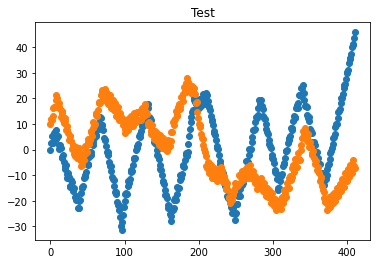

In [23]:
from matplotlib import pyplot as plt
import os
import Bio
from Bio.PDB import PDBParser
from Bio.PDB.DSSP import DSSP
from Bio import pairwise2
from Bio.SubsMat import MatrixInfo as matlist
import math
from sklearn import decomposition
from matplotlib import pyplot as plt



class pdb_operations:
    def __init__(self):
        self.parser = PDBParser()
        
        
    def parse_structure(self, pdb_path):

        structure = self.parser.get_structure(pdb_path, pdb_path)
        model = structure[0]
        dssp = DSSP(model, pdb_path)
        pca = decomposition.PCA(n_components=3)
        
        
        temp = structure.get_residues()
        
        thing = [] 
        for residue in model:

            for atom in residue.get_atoms():

                if atom.name =="CA":
                    thing.append(atom.get_coord())
                    
        fitted = pca.fit(thing[:len(thing)//1])
        transformed = fitted.transform(thing)

        trans2 = list(map(lambda x: x[0], transformed))
        trans3 = list(map(lambda x: x[1], transformed))
        plt.figure()
        plt.scatter(range(len(trans2)), trans2)
        plt.scatter(range(len(trans3)), trans3)


        plt.title("Test")
#         print(root.split("/")[1]+".png")
#         plt.savefig(root.split("/")[1]+".png")
        plt.show()

p = ResiduePicker()
p.parse_structure("relaxed_model_1.pdb")

In [25]:


input_dirs = ["2.A.1.1.24.fasta","2.A.1.1.28.fasta","2.A.1.1.3.fasta","2.A.1.1.37.fasta","2.A.1.1.91.fasta","2.A.1.11.1.fasta","2.A.1.13.5.fasta","2.A.1.14.16.fasta","2.A.1.2.15.fasta","2.A.1.2.19.fasta","2.A.1.2.44.fasta","2.A.1.2.5.fasta","2.A.1.2.60.fasta","2.A.1.2.9.fasta","2.A.1.22.6.fasta","2.A.1.4.3.fasta","2.A.1.5.1.fasta","2.A.1.6.4.fasta","2.A.1.7.1.fasta","2.A.1.8.1.fasta","2.A.1.8.10.fasta","2.A.1.9.10.fasta","2.A.17.1.2.fasta","2.A.17.1.4.fasta","2.A.17.1.6.fasta","2.A.17.1.7.fasta","2.A.17.3.1.fasta","2.A.17.4.7.fasta","2.A.17.4.8.fasta","2.A.57.1.1.fasta","2.A.57.2.4.fasta","2.A.60.1.19.fasta","2.A.100.1.4.fasta","2.A.100.2.1.fasta","5.B.2.1.3.fasta"]

p = pdb_operations() 

for root, dirs, files in os.walk(".", topdown=False):

    root_split = root.split("/")
    if len(root_split) > 1 and root_split[1] in input_dirs and root_split[-1] == "structure_0":

#         print(root)
        for file in files:
            
            file_split = file.split(".")
            if file_split[-1] == "pdb" and file.startswith("unrelaxed"):

                pdb_path = os.path.join(root,file)
                p.parse_structure(pdb_path)

In [ ]:
#                 structure = p.get_structure("2.A.1.9.10", os.path.join(root,file))
#                 model = structure[0]
#                 dssp = DSSP(model, os.path.join(root,file))
#                 print("".join(list(map(lambda x: x[2], dssp.property_list))))

#                 pca = decomposition.PCA(n_components=2)
#                 thing = [] 

#                 temp = structure.get_residues()
#                 for residue in model:

#                     for atom in residue.get_atoms():

#                         if atom.name =="CA":
#                             thing.append(atom.get_coord())
#                 fitted = pca.fit(thing[:len(thing)//1])
#                 transformed = fitted.transform(thing)
            
            
#                 trans2 = list(map(lambda x: x[0], transformed))
#                 trans3 = list(map(lambda x: x[1], transformed))
#                 plt.figure()
#                 plt.scatter(range(len(trans2)), trans2)
#                 plt.scatter(range(len(trans3)), trans3)
                
    
#                 plt.title(root.split("/")[1])
#                 print(root.split("/")[1]+".png")
#                 plt.savefig(root.split("/")[1]+".png")

In [ ]:
Bio.PDB.internal_coords()